In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.shape

(10886, 12)

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [5]:
test.shape

(6493, 9)

In [6]:
train.head()    #head()默认输出数据的前5行


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()   #查看数据的基本信息，行列索引，非空值个数、数据类型、存储空间

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
train.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
#value_counts统计Embarked这列的值的个数
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [10]:
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

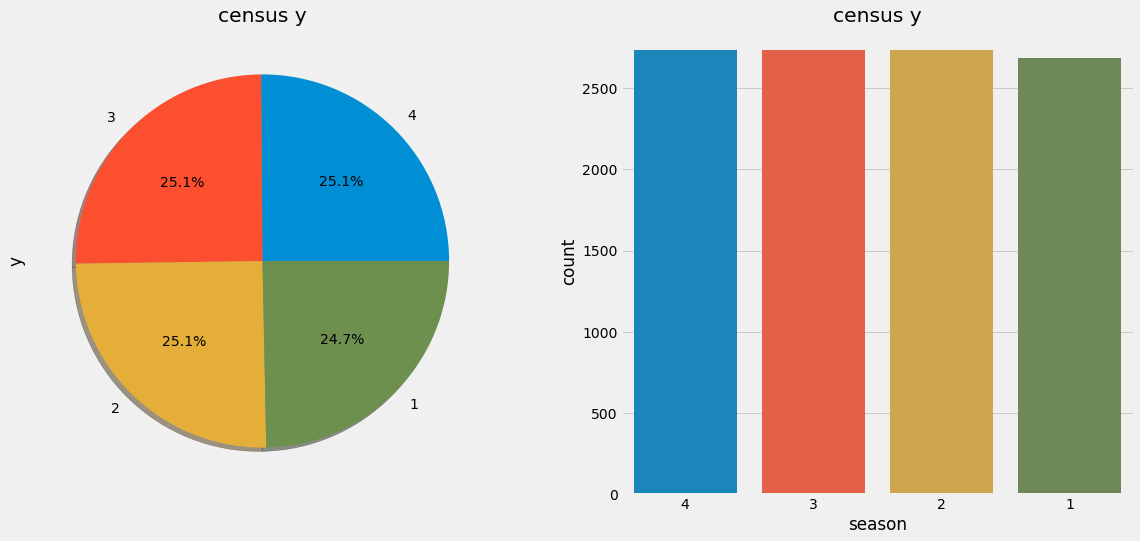

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
train['season'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('census y')
ax[0].set_ylabel('y')
sns.countplot('season',data=train,ax=ax[1],order=train['season'].value_counts().index)
ax[1].set_title('census y')
plt.show()

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610 

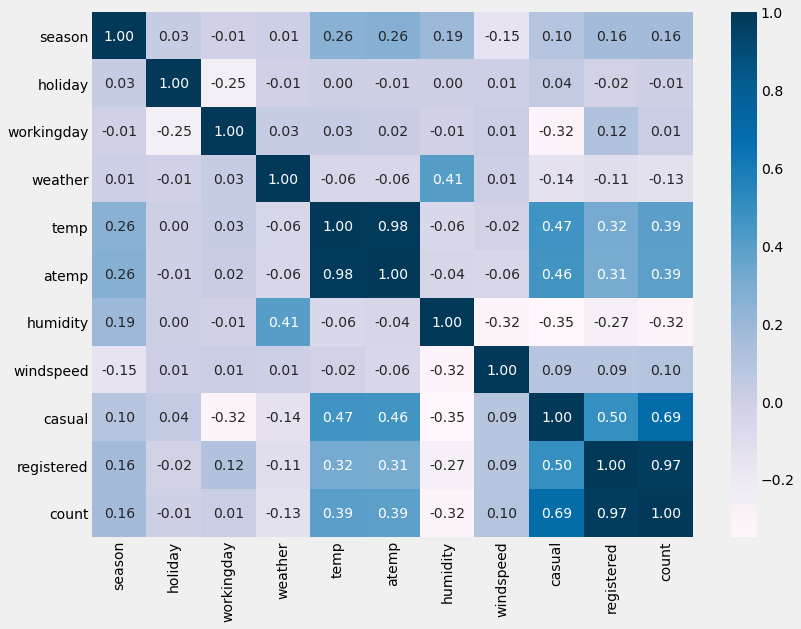

In [12]:
corrmat = train.corr()#得到相关系数
print(corrmat)
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='PuBu')

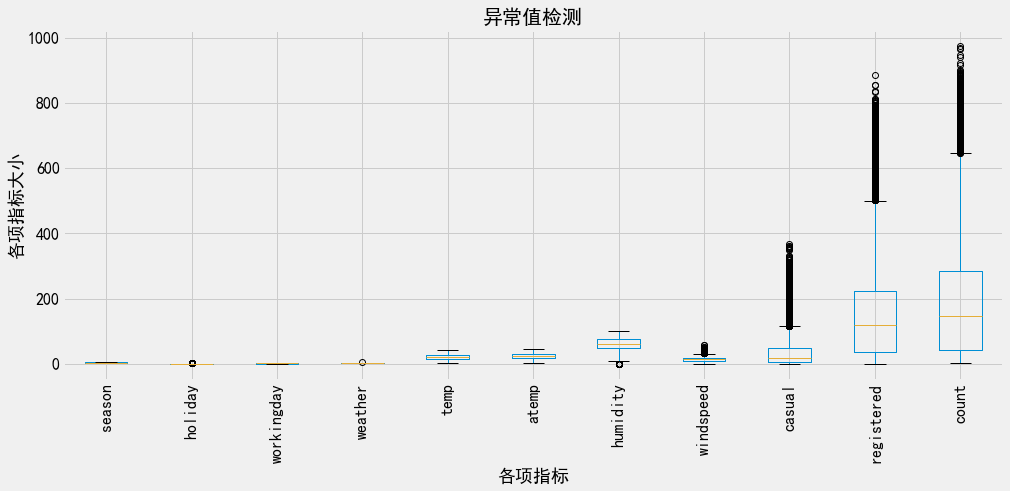

In [13]:

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure(figsize=(15,6))
train.boxplot()
plt.title('异常值检测',fontsize=20)
plt.xlabel('各项指标',fontsize=18)
plt.ylabel('各项指标大小',fontsize=18)
plt.xticks(rotation=90)#旋转横坐标
plt.tick_params(labelsize=16)#增大横坐标刻度大小
plt.show()

In [14]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


1、将train数据集中count目标变量提取出来
2、将train数据集剩余变量进行特征缩放，test数据集同样进行特征缩放
3、将train数据集的x和y放入分类模型中进行模型训练
4、将训练好的分类模型用于test数据集的预测，预测的结果就是test数据集的count

In [17]:
y_train = train['count']    #count目标变量提取出来
X_train = train.drop(['count','datetime','casual', 'registered'], axis = 1)     #train中剩余变量记为x

X_test = test.drop(['datetime'], axis = 1)

In [18]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0000
1,1,0,0,1,9.02,13.635,80,0.0000
2,1,0,0,1,9.02,13.635,80,0.0000
3,1,0,0,1,9.84,14.395,75,0.0000
4,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027
10882,4,0,1,1,14.76,17.425,57,15.0013
10883,4,0,1,1,13.94,15.910,61,15.0013
10884,4,0,1,1,13.94,17.425,61,6.0032


In [ ]:
X_test.shape

In [ ]:
#最大值最小值规范化，默认最小值为0，最大值为1
from sklearn.preprocessing import MinMaxScaler             
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)   #train中的x进行特征缩放
X_test_scaler = scaler.fit_transform(X_test)    #test进行特征缩放

In [ ]:
#导入朴素贝叶斯、决策树、支持向量机分类模型
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
   
nb = KNeighborsRegressor() #朴素贝叶斯
tree = DecisionTreeRegressor() #决策树
lr = LinearRegression() #支持向量机SVC，回归用的是SVR

In [ ]:
nb.fit(X_train_scaler, y_train)    #使用朴素贝叶斯进行模型训练
count_pred1 = nb.predict(X_test_scaler)
#利用训练好的朴素贝叶斯模型预测test数据集中的survived
count_pred1

In [ ]:
tree.fit(X_train_scaler, y_train)    #使用决策树进行模型训练
count_pred2 = tree.predict(X_test_scaler)
#利用训练好的决策树模型预测test数据集中的survived
count_pred2

In [ ]:
lr.fit(X_train_scaler, y_train)    #使用支持向量机进行模型训练
count_pred3 = lr.predict(X_test_scaler)
#利用训练好的支持向量机模型预测test数据集中的survived
count_pred3

In [ ]:
#将有标签的x_train划分为训练集和验证集
from sklearn.model_selection import train_test_split  
#将train划分为训练集和验证集
train_x, test_x,train_y,test_y = train_test_split(X_train_scaler,y_train ,test_size = 0.2,
                                   random_state = 9)   
#划分比例为8:2，random_state为保证程序每次运行都分割一样的训练集和验证集

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits = 5)

def cross_clf(clf, X_train, y_train):
    print(clf.__class__.__name__)
    s = []
    for train_index, test_index in kf.split(X_train):
        kf_X_train = X_train[train_index]  #训练集的X
        kf_y_train = y_train[train_index]  #训练集的Y
        kf_X_test = X_train[test_index]  #测试集或验证集的X
        kf_y_test = y_train[test_index]  #测试集或验证集的Y
        
        clf.fit(kf_X_train, kf_y_train)
        y_pred = clf.predict(kf_X_test)
        mse = mean_squared_error(kf_y_test, y_pred)
        print(mse) 
        s.append(mse)
    import numpy as np 
    F1 = np.array(s)
    print('mean_squared_error', np.mean(s)) 

In [ ]:
for clf in [nb, tree, lr]:
    cross_clf(clf, X_train_scaler, y_train)